In [14]:
from IPython.display import Image, display

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import time
from datetime import timedelta
import os

# Functions and classes for loading and using the Inception model.
import inception

# We use Pretty Tensor to define the new classifier.
import prettytensor as pt

In [16]:
import eye
from eye import num_classes

In [17]:
data_dir = eye.data_dir

In [18]:
dataset = eye.load()

Creating dataset from the files in: data/eyes
- Data saved to cache-file: data/eyes\eye.pkl


In [19]:
class_names = dataset.class_names
class_names

['n012267677',
 'n01443537',
 'n01629819',
 'n01641577',
 'n01644900',
 'n01698640',
 'n01742172',
 'n01768244',
 'n01770393',
 'n01774384',
 'n01774750',
 'n01784675',
 'n01855672',
 'n01882714',
 'n01910747',
 'n01917289',
 'n01944390',
 'n01945685',
 'n01950731',
 'n01983481',
 'n01984695',
 'n02002724',
 'n02056570',
 'n02058221',
 'n02074367',
 'n02085620',
 'n02094433',
 'n02099601',
 'n02099712',
 'n02106662',
 'n02113799',
 'n02123045',
 'n02123394',
 'n02124075',
 'n02125311',
 'n02129165',
 'n02132136',
 'n02165456',
 'n02190166',
 'n02206856',
 'n02226429',
 'n02231487',
 'n02233338',
 'n02236044',
 'n02268443',
 'n02279972',
 'n02281406',
 'n02321529',
 'n02364673',
 'n02395406',
 'n02403003',
 'n02410509',
 'n02415577',
 'n02423022',
 'n02437312',
 'n02480495',
 'n02481823',
 'n02486410',
 'n02504458',
 'n02509815',
 'n02666196',
 'n02669723',
 'n02699494',
 'n02730930',
 'n02769748',
 'n02788148',
 'n02791270',
 'n02793495',
 'n02795169',
 'n02802426',
 'n02808440',
 'n02

In [20]:
image_paths_train, cls_train, labels_train = dataset.get_training_set()

In [21]:
image_paths_train[:]

['C:\\Major\\COGS 181\\finall\\Image\\data\\eyes\\n012267677\\n12267677_0.JPEG',
 'C:\\Major\\COGS 181\\finall\\Image\\data\\eyes\\n012267677\\n12267677_1.JPEG',
 'C:\\Major\\COGS 181\\finall\\Image\\data\\eyes\\n012267677\\n12267677_10.JPEG',
 'C:\\Major\\COGS 181\\finall\\Image\\data\\eyes\\n012267677\\n12267677_100.JPEG',
 'C:\\Major\\COGS 181\\finall\\Image\\data\\eyes\\n012267677\\n12267677_101.JPEG',
 'C:\\Major\\COGS 181\\finall\\Image\\data\\eyes\\n012267677\\n12267677_102.JPEG',
 'C:\\Major\\COGS 181\\finall\\Image\\data\\eyes\\n012267677\\n12267677_103.JPEG',
 'C:\\Major\\COGS 181\\finall\\Image\\data\\eyes\\n012267677\\n12267677_104.JPEG',
 'C:\\Major\\COGS 181\\finall\\Image\\data\\eyes\\n012267677\\n12267677_105.JPEG',
 'C:\\Major\\COGS 181\\finall\\Image\\data\\eyes\\n012267677\\n12267677_106.JPEG',
 'C:\\Major\\COGS 181\\finall\\Image\\data\\eyes\\n012267677\\n12267677_107.JPEG',
 'C:\\Major\\COGS 181\\finall\\Image\\data\\eyes\\n012267677\\n12267677_108.JPEG',
 'C:\\Maj

In [22]:
image_paths_test, cls_test, labels_test = dataset.get_test_set()

In [23]:
image_paths_test[:]

['C:\\Major\\COGS 181\\finall\\Image\\data\\eyes\\n012267677\\test\\val_1351.JPEG',
 'C:\\Major\\COGS 181\\finall\\Image\\data\\eyes\\n012267677\\test\\val_1419.JPEG',
 'C:\\Major\\COGS 181\\finall\\Image\\data\\eyes\\n012267677\\test\\val_1463.JPEG',
 'C:\\Major\\COGS 181\\finall\\Image\\data\\eyes\\n012267677\\test\\val_1577.JPEG',
 'C:\\Major\\COGS 181\\finall\\Image\\data\\eyes\\n012267677\\test\\val_1696.JPEG',
 'C:\\Major\\COGS 181\\finall\\Image\\data\\eyes\\n012267677\\test\\val_1766.JPEG',
 'C:\\Major\\COGS 181\\finall\\Image\\data\\eyes\\n012267677\\test\\val_1955.JPEG',
 'C:\\Major\\COGS 181\\finall\\Image\\data\\eyes\\n012267677\\test\\val_2162.JPEG',
 'C:\\Major\\COGS 181\\finall\\Image\\data\\eyes\\n012267677\\test\\val_2267.JPEG',
 'C:\\Major\\COGS 181\\finall\\Image\\data\\eyes\\n012267677\\test\\val_2583.JPEG',
 'C:\\Major\\COGS 181\\finall\\Image\\data\\eyes\\n012267677\\test\\val_2886.JPEG',
 'C:\\Major\\COGS 181\\finall\\Image\\data\\eyes\\n012267677\\test\\val_3052

In [24]:
print("Size of:")
print("- Training-set:\t\t{}".format(len(image_paths_train)))
print("- Test-set:\t\t{}".format(len(image_paths_test)))

Size of:
- Training-set:		139308
- Test-set:		10000


In [191]:
def plot_images(images, cls_true, cls_pred=None, smooth=True):

    assert len(images) == len(cls_true)

    # Create figure with sub-plots.
    fig, axes = plt.subplots(3, 3)

    # Adjust vertical spacing.
    if cls_pred is None:
        hspace = 0.3
    else:
        hspace = 0.6
    fig.subplots_adjust(hspace=hspace, wspace=0.3)

    # Interpolation type.
    if smooth:
        interpolation = 'spline16'
    else:
        interpolation = 'nearest'

    for i, ax in enumerate(axes.flat):
        # There may be less than 9 images, ensure it doesn't crash.
        if i < len(images):
            # Plot image.
            ax.imshow(images[i],
                      interpolation=interpolation)

            # Name of the true class.
            cls_true_name = class_names[cls_true[i]]

            # Show true and predicted classes.
            if cls_pred is None:
                xlabel = "True: {0}".format(cls_true_name)
            else:
                # Name of the predicted class.
                cls_pred_name = class_names[cls_pred[i]]

                xlabel = "True: {0}\nPred: {1}".format(cls_true_name, cls_pred_name)

            # Show the classes as the label on the x-axis.
            ax.set_xlabel(xlabel)
        
        # Remove ticks from the plot.
        ax.set_xticks([])
        ax.set_yticks([])
    
    # Ensure the plot is shown correctly with multiple plots
    # in a single Notebook cell.
    plt.show()

In [192]:
from matplotlib.image import imread

def load_images(image_paths):
    # Load the images from disk.
    images = [imread(path) for path in image_paths]

    # Convert to a numpy array and return it.
    return np.asarray(images)

In [193]:
cls_test.shape

(10000,)

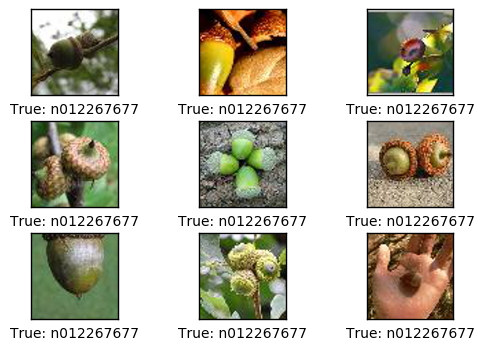

In [194]:
# Load the first images from the test-set.
images = load_images(image_paths=image_paths_test[0:9])

# Get the true classes for those images.
cls_true = cls_test[0:9]

# Plot the images and labels using our helper-function above.
plot_images(images=images, cls_true=cls_true, smooth=True)

In [195]:
inception.maybe_download()

Data has apparently already been downloaded and unpacked.


In [196]:
model = inception.Inception()

In [197]:
from inception import transfer_values_cache

In [198]:
file_path_cache_train = os.path.join(data_dir, 'inception-eye-train.pkl')
file_path_cache_test = os.path.join(data_dir, 'inception-eye-test.pkl')

In [199]:
print("Processing Inception transfer-values for training-images ...")

# If transfer-values have already been calculated then reload them,
# otherwise calculate them and save them to a cache-file.
transfer_values_train = transfer_values_cache(cache_path=file_path_cache_train,
                                              image_paths=image_paths_train,
                                              model=model)

Processing Inception transfer-values for training-images ...
- Data loaded from cache-file: data/eyes\inception-eye-train.pkl


In [200]:
print("Processing Inception transfer-values for test-images ...")

# If transfer-values have already been calculated then reload them,
# otherwise calculate them and save them to a cache-file.
transfer_values_test = transfer_values_cache(cache_path=file_path_cache_test,
                                             image_paths=image_paths_test,
                                             model=model)

Processing Inception transfer-values for test-images ...
- Data loaded from cache-file: data/eyes\inception-eye-test.pkl


In [201]:
transfer_values_train.shape

(139308, 2048)

In [202]:
transfer_values_test.shape

(10000, 2048)

In [203]:
def plot_transfer_values(i):
    print("Input image:")
    
    # Plot the i'th image from the test-set.
    image = imread(image_paths_test[i])
    #plt.imshow(image, interpolation='spline16')
    plt.imshow(image, interpolation='spline16')
    plt.show()
    
    print("Transfer-values for the image using Inception model:")
    
    # Transform the transfer-values into an image.
    img = transfer_values_test[i]
    print(img.shape)
    img = img.reshape((32, 64)) #original
    #img = img.reshape((64,64))
    # Plot the image for the transfer-values.
    plt.imshow(img, interpolation='nearest', cmap='Reds')
    plt.show()

In [204]:
transfer_values_test[10].shape

(2048,)

In [205]:
image = imread(image_paths_test[10])

Input image:


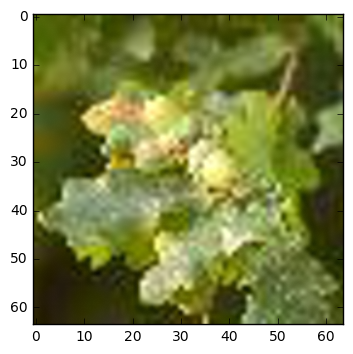

Transfer-values for the image using Inception model:
(2048,)


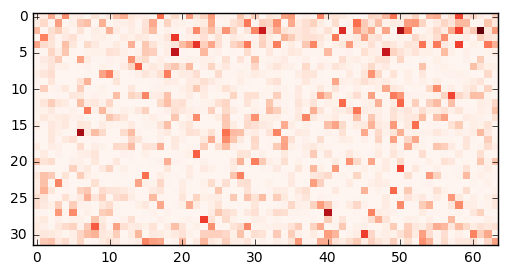

In [206]:
plot_transfer_values(i=10)

In [207]:
from sklearn.decomposition import PCA

In [208]:
pca = PCA(n_components=50)

In [209]:
# transfer_values = transfer_values_train[0:3000]
transfer_values = transfer_values_train

In [210]:
# cls = cls_train[0:3000]
cls = cls_train

In [211]:
transfer_values.shape

(139308, 2048)

In [212]:
transfer_values

array([[ 0.67642874,  0.36481649,  0.14207451, ...,  0.14685547,
         0.53846532,  0.6574018 ],
       [ 0.18332461,  0.43279025,  0.3536644 , ...,  0.        ,
         0.79219466,  0.57928711],
       [ 0.18340783,  0.52494329,  0.20574258, ...,  0.41560999,
         0.58760488,  1.0763948 ],
       ..., 
       [ 0.00927979,  0.07369915,  0.02601687, ...,  0.        ,
         0.0136905 ,  0.        ],
       [ 0.09628385,  0.19647735,  0.17110667, ...,  0.23217794,
         0.08234147,  0.16052181],
       [ 0.07213601,  1.00270617,  0.16988206, ...,  1.31617069,
         0.53368354,  0.47297803]], dtype=float32)

In [213]:
transfer_values_reduced = pca.fit_transform(transfer_values)

In [214]:
transfer_values_reduced.shape

(139308, 50)

In [215]:

def plot_scatter(values, cls):
    # Create a color-map with a different color for each class.
    import matplotlib.cm as cm
    cmap = cm.rainbow(np.linspace(0.0, 1.0, num_classes))

    # Create an index with a random permutation to make a better plot.
    idx = np.random.permutation(len(values))
    
    # Get the color for each sample.
    colors = cmap[cls[idx]]

    # Extract the x- and y-values.
    x = values[idx, 0]
    y = values[idx, 1]

    # Plot it.
    plt.scatter(x, y, color=colors, alpha=0.5)
    plt.show()

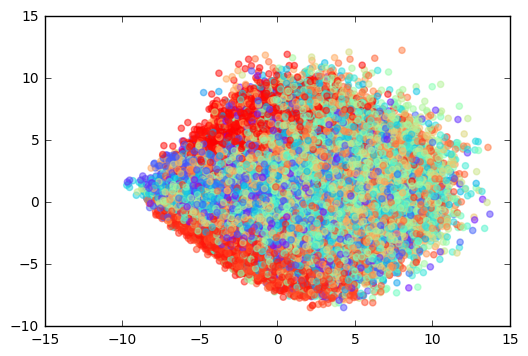

In [216]:
plot_scatter(transfer_values_reduced, cls=cls)

In [217]:
#from sklearn.manifold import TSNE

In [218]:
#pca = PCA(n_components=50)
#transfer_values_50d = pca.fit_transform(transfer_values)

In [219]:
#since the we got 100000 training samples, the size ^2, we can't use tsne to help with the visualization
#tsne = TSNE(n_components=2,perplexity=50)

In [220]:
#transfer_values_reduced = tsne.fit_transform(transfer_values_50d)

In [221]:
#transfer_values_reduced.shape

In [222]:
#plot_scatter(transfer_values_reduced, cls=cls)

In [223]:
transfer_len = model.transfer_len

In [224]:
x = tf.placeholder(tf.float32, shape=[None, transfer_len], name='x')

In [225]:
y_true = tf.placeholder(tf.float32, shape=[None, num_classes], name='y_true')
num_classes

200

In [226]:
y_true_cls = tf.argmax(y_true, dimension=1)

In [227]:
# Wrap the transfer-values as a Pretty Tensor object.
x_pretty = pt.wrap(x)

with pt.defaults_scope(activation_fn=tf.nn.relu):
    y_pred, loss = x_pretty.\
        fully_connected(size=1024, name='layer_fc1').\
        softmax_classifier(num_classes=num_classes, labels=y_true)

In [228]:
global_step = tf.Variable(initial_value=0,
                          name='global_step', trainable=False)

In [229]:
#optimizer = tf.train.AdamOptimizer(learning_rate=1e-4,beta1=0.9, beta2=0.999, epsilon=1e-06).minimize(loss, global_step)

#optimizer = tf.train.MomentumOptimizer(learning_rate=5e-3,momentum = 0.1,use_nesterov=True).minimize(loss, global_step)

optimizer = tf.train.RMSPropOptimizer(learning_rate=5e-1,epsilon=1).minimize(loss, global_step)

#optimizer = tf.train.GradientDescentOptimizer(learning_rate=5e-1).minimize(loss, global_step)

In [230]:
optimizer

<tf.Operation 'RMSProp_1' type=AssignAdd>

In [231]:
y_pred_cls = tf.argmax(y_pred, dimension=1)

In [232]:
correct_prediction = tf.equal(y_pred_cls, y_true_cls)

In [233]:
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [234]:
saver = tf.train.Saver()
save_dir = 'checkpoints/'
if not os.path.exists(save_dir):
    os.makedirs(save_dir)
save_path = os.path.join(save_dir, 'best_validation')

In [235]:
session = tf.Session()

In [236]:
session.run(tf.global_variables_initializer())

In [237]:
#train_batch_size = 256
train_batch_size = 64

In [238]:
def random_batch():
    # Number of images (transfer-values) in the training-set.
    num_images = len(transfer_values_train)

    # Create a random index.
    idx = np.random.choice(num_images,
                           size=train_batch_size,
                           replace=False)

    # Use the random index to select random x and y-values.
    # We use the transfer-values instead of images as x-values.
    x_batch = transfer_values_train[idx]
    y_batch = labels_train[idx]

    return x_batch, y_batch

In [239]:
# Counter for total number of iterations performed so far.
total_iterations = 0

def optimize(num_iterations):
    # Ensure we update the global variables rather than local copies.
    global total_iterations
    global best_validation_accuracy
    global last_improvement
    
    # Start-time used for printing time-usage below.
    start_time = time.time()

    for i in range(num_iterations):
        # Increase the total number of iterations performed.
        # It is easier to update it in each iteration because
        # we need this number several times in the following.
        total_iterations += 1
        
        # Get a batch of training examples.
        # x_batch now holds a batch of images (transfer-values) and
        # y_true_batch are the true labels for those images.
        x_batch, y_true_batch = random_batch()

        # Put the batch into a dict with the proper names
        # for placeholder variables in the TensorFlow graph.
        feed_dict_train = {x: x_batch,
                           y_true: y_true_batch}

        # Run the optimizer using this batch of training data.
        # TensorFlow assigns the variables in feed_dict_train
        # to the placeholder variables and then runs the optimizer.
        # We also want to retrieve the global_step counter.
        i_global, _ = session.run([global_step, optimizer],
                                  feed_dict=feed_dict_train)

        # Print status to screen every 100 iterations (and last).
        if (i_global % 100 == 0) or (i == num_iterations - 1):
            
            # Save all variables of the TensorFlow graph to file.
            saver.save(sess=session, save_path=save_path)
                
            # Calculate the accuracy on the training-batch.
            batch_acc = session.run(accuracy,
                                    feed_dict=feed_dict_train)

            # Print status.
            msg = "Checkpoint saved, Global Step: {0:>6}, Training Batch Accuracy: {1:>6.1%}"
            print(msg.format(i_global, batch_acc))

    # Ending time.
    end_time = time.time()

    # Difference between start and end-times.
    time_dif = end_time - start_time

    # Print the time-usage.
    print("Time usage: " + str(timedelta(seconds=int(round(time_dif)))))

In [240]:

def plot_example_errors(cls_pred, correct):
    # This function is called from print_test_accuracy() below.

    # cls_pred is an array of the predicted class-number for
    # all images in the test-set.

    # correct is a boolean array whether the predicted class
    # is equal to the true class for each image in the test-set.

    # Negate the boolean array.
    incorrect = (correct == False)

    # Get the indices for the incorrectly classified images.
    idx = np.flatnonzero(incorrect)

    # Number of images to select, max 9.
    n = min(len(idx), 9)
    
    # Randomize and select n indices.
    idx = np.random.choice(idx,
                           size=n,
                           replace=False)

    # Get the predicted classes for those images.
    cls_pred = cls_pred[idx]

    # Get the true classes for those images.
    cls_true = cls_test[idx]

    # Load the corresponding images from the test-set.
    # Note: We cannot do image_paths_test[idx] on lists of strings.
    image_paths = [image_paths_test[i] for i in idx]
    images = load_images(image_paths)

    # Plot the images.
    plot_images(images=images,
                cls_true=cls_true,
                cls_pred=cls_pred)

In [241]:
# Import a function from sklearn to calculate the confusion-matrix.
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cls_pred):
    # This is called from print_test_accuracy() below.

    # cls_pred is an array of the predicted class-number for
    # all images in the test-set.

    # Get the confusion matrix using sklearn.
    cm = confusion_matrix(y_true=cls_test,  # True class for test-set.
                          y_pred=cls_pred)  # Predicted class.

    # Print the confusion matrix as text.
    for i in range(num_classes):
        # Append the class-name to each line.
        class_name = "({}) {}".format(i, class_names[i])
        print(cm[i, :], class_name)

    # Print the class-numbers for easy reference.
    class_numbers = [" ({0})".format(i) for i in range(num_classes)]
    print("".join(class_numbers))

In [242]:
# Split the data-set in batches of this size to limit RAM usage.
batch_size = 256

def predict_cls(transfer_values, labels, cls_true):
    # Number of images.
    num_images = len(transfer_values)

    # Allocate an array for the predicted classes which
    # will be calculated in batches and filled into this array.
    cls_pred = np.zeros(shape=num_images, dtype=np.int)

    # Now calculate the predicted classes for the batches.
    # We will just iterate through all the batches.
    # There might be a more clever and Pythonic way of doing this.

    # The starting index for the next batch is denoted i.
    i = 0

    while i < num_images:
        # The ending index for the next batch is denoted j.
        j = min(i + batch_size, num_images)

        # Create a feed-dict with the images and labels
        # between index i and j.
        feed_dict = {x: transfer_values[i:j],
                     y_true: labels[i:j]}

        # Calculate the predicted class using TensorFlow.
        cls_pred[i:j] = session.run(y_pred_cls, feed_dict=feed_dict)

        # Set the start-index for the next batch to the
        # end-index of the current batch.
        i = j
        
    # Create a boolean array whether each image is correctly classified.
    correct = (cls_true == cls_pred)

    return correct, cls_pred

In [243]:
def predict_cls_test():
    return predict_cls(transfer_values = transfer_values_test,
                       labels = labels_test,
                       cls_true = cls_test)

In [244]:
def classification_accuracy(correct):
    # When averaging a boolean array, False means 0 and True means 1.
    # So we are calculating: number of True / len(correct) which is
    # the same as the classification accuracy.

    # Return the classification accuracy
    # and the number of correct classifications.
    return correct.mean(), correct.sum()

In [245]:
def print_test_accuracy(show_example_errors=False,
                        show_confusion_matrix=False):

    # For all the images in the test-set,
    # calculate the predicted classes and whether they are correct.
    correct, cls_pred = predict_cls_test()
    
    # Classification accuracy and the number of correct classifications.
    acc, num_correct = classification_accuracy(correct)
    
    # Number of images being classified.
    num_images = len(correct)

#     # Print the accuracy.
    msg = "Accuracy on Test-Set: {0:.1%} ({1} / {2})"
    print(msg.format(acc, num_correct, num_images))
    
    # Plot some examples of mis-classifications, if desired.
    if show_example_errors:
        print("Example errors:")
        plot_example_errors(cls_pred=cls_pred, correct=correct)

    # Plot the confusion matrix, if desired.
    if show_confusion_matrix:
        print("Confusion Matrix:")
        plot_confusion_matrix(cls_pred=cls_pred)

In [255]:
optimize(num_iterations=40000)

Checkpoint saved, Global Step:  80100, Training Batch Accuracy: 100.0%
Checkpoint saved, Global Step:  80200, Training Batch Accuracy: 100.0%
Checkpoint saved, Global Step:  80300, Training Batch Accuracy: 100.0%
Checkpoint saved, Global Step:  80400, Training Batch Accuracy: 100.0%
Checkpoint saved, Global Step:  80500, Training Batch Accuracy: 100.0%
Checkpoint saved, Global Step:  80600, Training Batch Accuracy: 100.0%
Checkpoint saved, Global Step:  80700, Training Batch Accuracy: 100.0%
Checkpoint saved, Global Step:  80800, Training Batch Accuracy: 100.0%
Checkpoint saved, Global Step:  80900, Training Batch Accuracy: 100.0%
Checkpoint saved, Global Step:  81000, Training Batch Accuracy: 100.0%
Checkpoint saved, Global Step:  81100, Training Batch Accuracy: 100.0%
Checkpoint saved, Global Step:  81200, Training Batch Accuracy: 100.0%
Checkpoint saved, Global Step:  81300, Training Batch Accuracy: 100.0%
Checkpoint saved, Global Step:  81400, Training Batch Accuracy: 100.0%
Checkp

Accuracy on Test-Set: 71.0% (7095 / 10000)
Example errors:


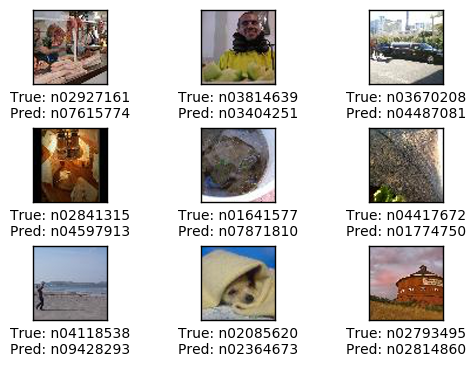

Confusion Matrix:
[35  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  2  1  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  2  0  0  1  0  1  0  0  0
  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  1  2  0] (0) n012267677
[ 0 40  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  1  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  1  0  0  0  0  0  1  0
  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0

In [257]:
# saver.restore(sess=session, save_path=save_path)
print_test_accuracy(show_example_errors=True,
                        show_confusion_matrix=True)

In [ ]:
# This has been commented out in case you want to modify and experiment
# with the Notebook without having to restart it.
model.close()
session.close()